<a href="https://colab.research.google.com/github/Zod55/model_pytorch/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [ ]:
import torch
from pathlib import Path
from sklearn.datasets import make_circles
import pandas as pd
from sklearn.model_selection import train_test_split
from torch import nn
import matplotlib.pyplot as plt

torch.manual_seed(42)

#making the data for our model
x1,y = make_circles(1000,noise=0.06,random_state=42)
x1 = torch.from_numpy(x1).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


#splitting the data for our model
trainx, testx, trainy, testy = train_test_split(x1,
                                                y,
                                                test_size=0.3,
                                                random_state=42)
device = "cuda" if torch.cuda.is_available() else "cpu"

testx = testx.to(device)
testy = testy.to(device)

#creating the model
class circles(nn.Module):
  def __init__(self):
      super().__init__()
      self.linar_layer1 = nn.Linear(in_features=2,out_features=10)
      self.linar_layer2 = nn.Linear(in_features=10,out_features=10)
      self.linar_layer3 = nn.Linear(in_features=10,out_features=1)
      self.relu = nn.ReLU()

  def forward(self, x):
      return self.linar_layer3(self.relu(self.linar_layer2(self.relu(self.linar_layer1(x)))))
#the model
model1 = circles().to(device)

#create a saving palce for aour model if we want to load it again
modeldir = Path("modeles")
modeldir.mkdir(parents= True , exist_ok=True)

PTH_MODELE0 = "model0.pth"
path_to_model = modeldir / PTH_MODELE0

torch.save(obj=model1.state_dict() , f=path_to_model)

#optimizer and loss function
optimizer = torch.optim.SGD(params= model1.parameters(), lr=0.001)
loss_fn = nn.BCEWithLogitsLoss()

#calculeting the acurccy of our model (same as the loss function but to see how much we are right)
def acurrcy(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acurrcy = (correct/len(y_pred))*100
  return acurrcy

trainx, testx = trainx.to(device) ,testx.to(device)
trainy, testy = trainy.to(device) ,testy.to(device)


ylogic = model1(trainx.to(device)).squeeze()
loss = loss_fn(ylogic,trainy)


# while  loss > 0.1:
#   model1.load_state_dict(torch.load(f=path_to_model))
for epoc in range(10**6):
  #train the model with the traning loop
    model1.train()
    ylogic = model1(trainx.to(device)).squeeze()
    ypred = torch.round(torch.sigmoid(ylogic))
    #see the loss and the acurracy
    loss = loss_fn(ylogic,trainy)
    acu = acurrcy(y_true=trainy,y_pred=ypred)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
   #chack the model
    model1.eval()

#   test the model after we train it
    with torch.inference_mode():

     test_logic = model1(testx).squeeze()
     testpred= torch.round(torch.sigmoid(test_logic))
     loss_test = loss_fn(test_logic,testy)
     ac = acurrcy(y_true=testy,y_pred=testpred)
    if epoc%100000 ==0:
      print(ac , acu)
torch.save(obj =model1.state_dict, f= path_to_model)


48.0 50.857142857142854
82.33333333333334 83.85714285714285
90.33333333333333 96.0
90.33333333333333 96.0
91.0 96.0
90.0 96.0
90.0 96.0
90.66666666666666 96.0
91.0 96.0
91.0 96.0


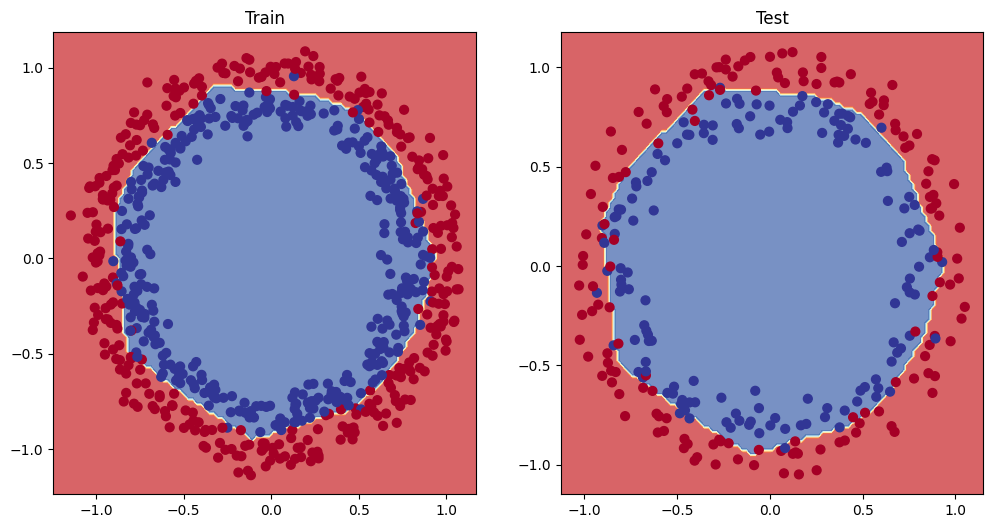

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, trainx, trainy)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, testx, testy)

In [ ]:
predmodel1 = model1(testx.to(device))[:5]


precent = torch.sigmoid(predmodel1)
precent , torch.round(precent) ,predmodel1

(tensor([[0.4458],
         [0.4218],
         [0.4603],
         [0.4403],
         [0.3978]], device='cuda:0', grad_fn=<SigmoidBackward0>),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]], device='cuda:0', grad_fn=<RoundBackward0>),
 tensor([[-0.2175],
         [-0.3155],
         [-0.1590],
         [-0.2397],
         [-0.4145]], device='cuda:0', grad_fn=<SliceBackward0>))